### Salary Data Comparison

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import math

In [7]:
data = pd.read_csv('Salary Data.csv')
df = pd.DataFrame(data)

df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### Data opschonen

In [17]:
naValues = df.isna()
nullValues = df.isnull()

print(df.isnull().sum(), df.isna().sum())

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64 Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


In [9]:
df.dropna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


### En nu data analyseren

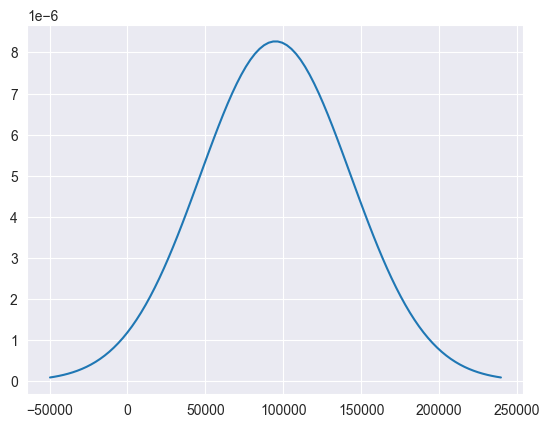

In [12]:
mu = df['Salary'].median()
variance = df['Salary'].var()
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()



### De outliers verwijderen

In [18]:
z = np.abs(stats.zscore(df['Salary']))

# Identify outliers as students with a z-score greater than 3
threshold = 3
outliers = df[z > threshold]

# Print the outliers
print(outliers)
# calculate IQR for column Salary
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df[(df['Salary'] < Q1 - threshold * IQR) | (df['Salary'] > Q3 + threshold * IQR)]

# drop rows containing outliers
df = df.drop(outliers.index)

# replace outliers with median value
df.loc[z > threshold, 'Salary'] = df['Salary'].median()


Empty DataFrame
Columns: [Age, Gender, Education Level, Job Title, Years of Experience, Salary]
Index: []


### Factorize Data

In [19]:
# Factorizing the data with a for loop
for column in df.columns:
    if df[column].dtype == 'object':
        df[column], _ = pd.factorize(df[column])


print(df.head())

    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       0                0          0                  5.0   90000.0
1  28.0       1                1          1                  3.0   65000.0
2  45.0       0                2          2                 15.0  150000.0
3  36.0       1                0          3                  7.0   60000.0
4  52.0       0                1          4                 20.0  200000.0


### Heatmap

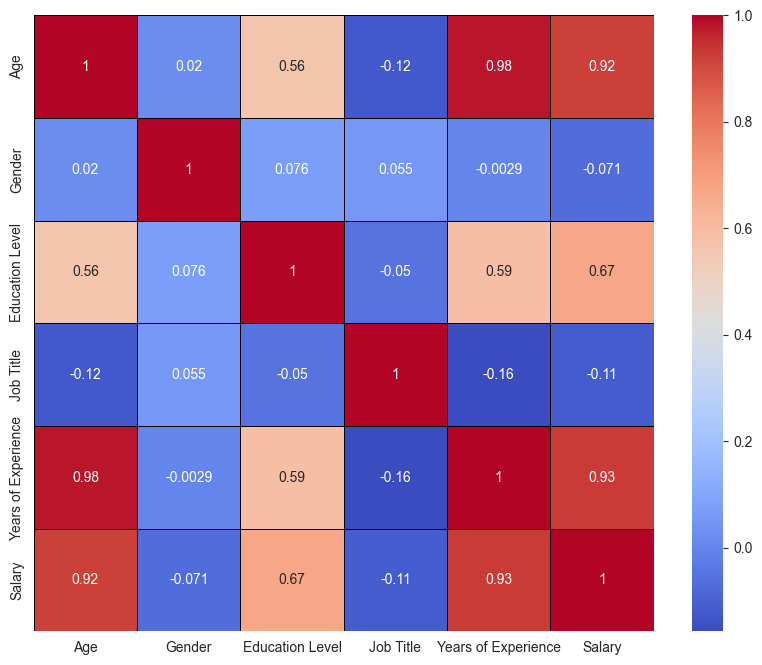

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.show()